In [ ]:
!pip install wandb

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense
import wandb
from wandb.keras import WandbCallback

import numpy as np
import cv2
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt


In [ ]:
wandb.login()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize


wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
wandb.init(project="Vehicles Classificationn", entity="gharabadiyan")

wandb: Currently logged in as: gharabadiyan. Use `wandb login --relogin` to force relogin


In [ ]:
dataset_path = '/content/drive/MyDrive/photos'
width = height = 224

idg = ImageDataGenerator(
    
    #Augmentation
    rescale = 1./255,
    horizontal_flip = True,
    zoom_range = 0.1,
    brightness_range = (0.9,1.1),
    rotation_range = 15,
    validation_split = 0.25 #validation data
)

train_data = idg.flow_from_directory(  #eamal taghirat bar roye tasavir
    dataset_path,
    target_size = (width,height),
    # save_to_dir = '/content/drive/MyDrive/Augmented_data',
    class_mode = "categorical",
    subset = "training"
)

val_data = idg.flow_from_directory(  #eamal taghirat bar roye tasavir
    dataset_path,
    target_size = (width,height),
    class_mode = "categorical",
    subset = "validation"
)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:179: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn('Using ".tiff" files with multiple bands '


Found 638 images belonging to 4 classes.
Found 210 images belonging to 4 classes.


In [ ]:
model = tf.keras.models.Sequential([
  Conv2D(32,(3,3),activation='relu',input_shape=(width,height,3)),
  Conv2D(32,(3,3),activation='relu'),
  MaxPool2D(),
  Conv2D(32,(3,3),activation='relu'),
  Conv2D(32,(3,3),activation='relu'),
  MaxPool2D(),
  Conv2D(64,(3,3),activation='relu'),
  Conv2D(64,(3,3),activation='relu'),
  MaxPool2D(),

  Flatten(),
  Dense(256,activation='relu'),
  Dense(4,activation='softmax')
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [ ]:
model.fit(train_data,validation_data=val_data,epochs=20,callbacks=[WandbCallback()])

wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/20
20/20 [==============================] - 566s 28s/step - loss: 1.3941 - accuracy: 0.2947 - val_loss: 1.3367 - val_accuracy: 0.3857 - _timestamp: 1655372105.0000 - _runtime: 666.0000
Epoch 2/20
20/20 [==============================] - 30s 2s/step - loss: 1.2725 - accuracy: 0.4373 - val_loss: 1.2316 - val_accuracy: 0.4190 - _timestamp: 1655372192.0000 - _runtime: 753.0000
Epoch 3/20
20/20 [==============================] - 30s 2s/step - loss: 1.1744 - accuracy: 0.4592 - val_loss: 1.1089 - val_accuracy: 0.5667 - _timestamp: 1655372221.0000 - _runtime: 782.0000
Epoch 4/20
20/20 [==============================] - 30s 2s/step - loss: 0.9998 - accuracy: 0.5909 - val_loss: 1.0104 - val_accuracy: 0.5048 - _timestamp: 1655372251.0000 - _runtime: 812.0000
Epoch 5/20
20/20 [==============================] - 30s 2s/step - loss: 0.9805 - accuracy: 0.5705 - val_loss: 0.9067 - val_accuracy: 0.5905 - _timestamp: 1655372281.0000 - _runtime: 842.0000
Epoch 6/20
20/20 [=========================

In [ ]:
model.save('model/Classification.h5')

In [ ]:
test_path = '/content/drive/MyDrive/test data'

idg = ImageDataGenerator(
    rescale = 1./255
)

test_data = idg.flow_from_directory( 
    test_path,
    target_size = (width,height),
    class_mode = "categorical",
)

Found 103 images belonging to 4 classes.


In [ ]:
model.evaluate(test_data)

4/4 [==============================] - 60s 20s/step - loss: 0.6475 - accuracy: 0.7961


[0.6474512219429016, 0.7961165308952332]

In [ ]:
Y_pred = model.predict(test_data)
y_pred = np.argmax(Y_pred, axis=1)
conf_mat = confusion_matrix(test_data.classes, y_pred)

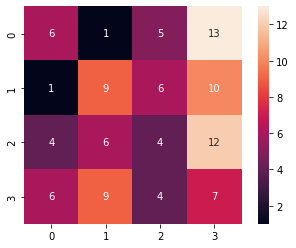

In [ ]:
sn.heatmap(conf_mat, annot=True)
plt.imshow(conf_mat)